In [3]:
import numpy as np
import timeit
import statistics
import random
import matplotlib.pyplot as plt

def objective(w,n,y,x,lmbda):
    sum_loss = 0
    for i in range(n):
        l = 1-y[i,]*(w.T.dot(x[i,:]))
        l = max(0, l)
        sum_loss+=l
    obj = (lmbda/2)*w.T.dot(w)
    obj+=sum_loss/n
    return obj.item()

def fly_pegasos(k,d,n,y,x,lmbda):
    w = np.zeros((d,1))
    k_max = 0
    t = 1
    iter_count = []
    objectives = []
    while True:
        #A_t = random.sample(range(n),k)
        class_1 = np.where(y == 1)
        class_neg1 = np.where(y==-1)
        if(k==1):
            ele=1
        else:
            ele = k//2
        A_t = []
        for element in random.sample(set(class_1[0]), ele):
            A_t.append(element)
        for element in random.sample(set(class_neg1[0]), ele):
            A_t.append(element)
        summation = 0
        ita = (1)/(lmbda*t)
        summation=np.zeros((d,1))
        for i in A_t:
            if(y[i]*w.T.dot(x[i])<1):
                k_max+=1
                summation+=y[i]*(x[i][:,None])
                
                if(k_max>100*n):
                    print(objective(w,n,y,x,lmbda))
                    print(t)
                    return iter_count,objectives
        w_t_half = (1-ita*lmbda)*w + (ita/k)*summation
        minimum = min(1, 1./(np.sqrt(lmbda)*np.linalg.norm(w_t_half)))
        w = minimum*w_t_half
        t = t+1
        iter_count.append(t)
        objectives.append(objective(w,n,y,x,lmbda))
        if(t>1000):
            print(objective(w,n,y,x,lmbda))
            print(t)
            return iter_count,objectives


def myPegasos(filename,k,numruns):
    mnist_data = np.loadtxt(filename,delimiter=',')
    n = mnist_data.shape[0]
    x = mnist_data[:,1:]
    d = x.shape[1]
    y = mnist_data[:,:1].reshape((n,1))
    y[y==1] = 1
    y[y==3] = -1
    lmbda = 10
    time_list = [0 for i in range(numruns)]
    colours=['r','g','b','c','m','y','k','w']
    for i in range(numruns):
        start = timeit.default_timer()
        iter_count,objective = fly_pegasos(k,d,n,y,x,lmbda)
        plt.plot(iter_count, objective, colours[i])
        stop = timeit.default_timer()
        time_list[i] = stop-start
    print(time_list)
    print(statistics.stdev(time_list))
    plt.xlabel('iter')
    plt.ylabel('obj')
    plt.title('pegasos200')
    plt.show()


1
3.146673243117299
1001
1.931216334975994
1001
1.8407323184488091
1001
5.082468294158167
1001
4.381003966656491
1001
[13.07717332599998, 15.673457052000003, 13.416916066999988, 12.371471016999976, 12.233122512000023]
1.385839193831635


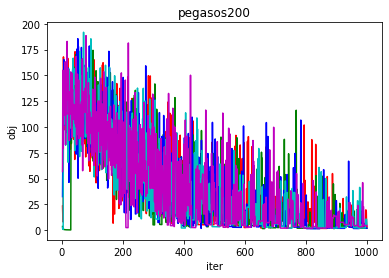

20
0.1319848165118914
1001
0.1334359290903237
1001
0.09660575208506343
1001
0.1218265537657374
1001
0.14373749148627835
1001
[12.472696776999896, 12.805395319000013, 12.487761890000002, 12.332549306999908, 12.381108565999966]
0.1845619767653616


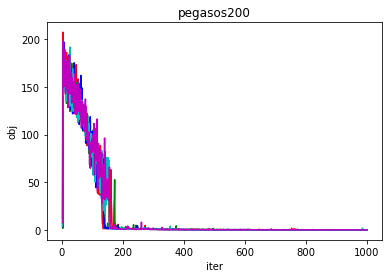

200
0.008854267295028972
1001
0.008759554042385133
1001
0.009840401007688546
1001
0.008681976171842269
1001
0.00855898514316002
1001
[12.292843938000033, 12.296443832000023, 12.172139132999973, 12.242471377000015, 12.300334053999904]
0.05490199247367446


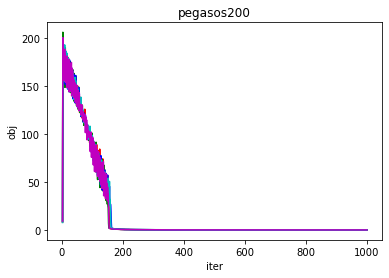

1000
0.007625007831572028
1001
0.007509842090685774
1001
0.007547874169848669
1001


In [ ]:
for i in [1,20,200,1000,2000]:
    print(i)
    myPegasos('/Users/shivambhandari/Desktop/csci5525/hw2/MNIST-13.csv',k=i,numruns=5)